<a href="https://colab.research.google.com/github/Shaurya016/Celebal-Assignment-04/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Upload the CSV file from your system
from google.colab import files
uploaded = files.upload()


Saving mobiles1.csv to mobiles1.csv


In [2]:
# STEP 2: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set(style="whitegrid")


In [3]:
# STEP 3: Load the dataset
df = pd.read_csv("mobiles1.csv")

# View first few rows
df.head()


,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [4]:
# STEP 4: Basic Information
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB

Missing Values:
battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        13
reviews       13
warranty     148
dtype: int64

Statistical Summary:
               price      rating
count     984.000000  971.000000
mean    15429.848577    4.241195
std     12891.355

In [6]:
# STEP 5: Feature Engineering

# Extract RAM and ROM
df['ram_gb'] = df['memory'].str.extract(r'(\d+)\s*GB RAM').astype(float)
df['rom_gb'] = df['memory'].str.extract(r'(\d+)\s*GB ROM').astype(float)

# Battery in mAh
df['battery_mah'] = df['battery'].str.extract(r'(\d+)\s*mAh').astype(float)

# Screen Size in inches
df['screen_size'] = df['display'].str.extract(r'(\d+\.\d+|\d+)\s*inch').astype(float)

# Rear Camera Count
df['rear_cam_count'] = df['camera'].str.extract(r'((?:\d+MP\s*\+?\s*)+)\|').apply(
    lambda x: x.str.count('MP')).astype(float)

# Front Camera MP
df['front_cam_mp'] = df['camera'].str.extract(r'\|\s*(\d+)\s*MP').astype(float)

# Clean Ratings and Reviews
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews_num'] = df['reviews'].str.replace(',', '').str.extract(r'(\d+)').astype(float)


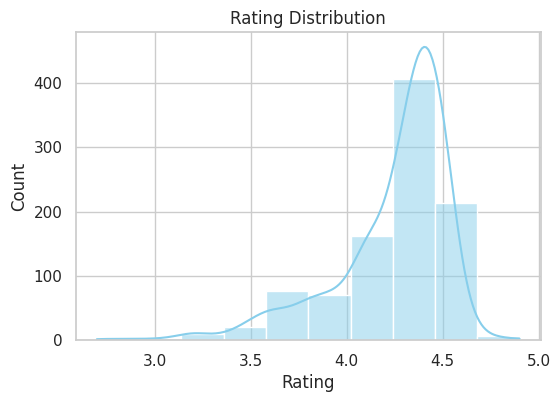

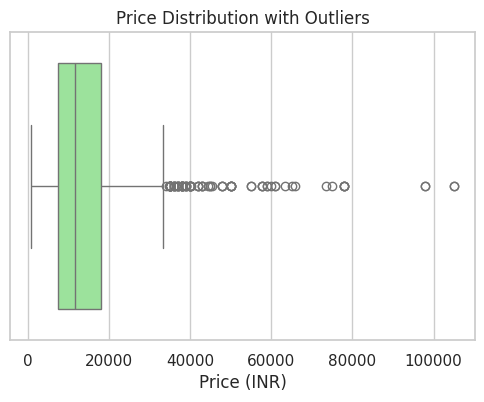

In [7]:
# STEP 6: Univariate Analysis

# Ratings distribution
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Price boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title("Price Distribution with Outliers")
plt.xlabel("Price (INR)")
plt.show()


<ipython-input-13-102931881>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ram_gb', y='price', data=df, palette='Set2')


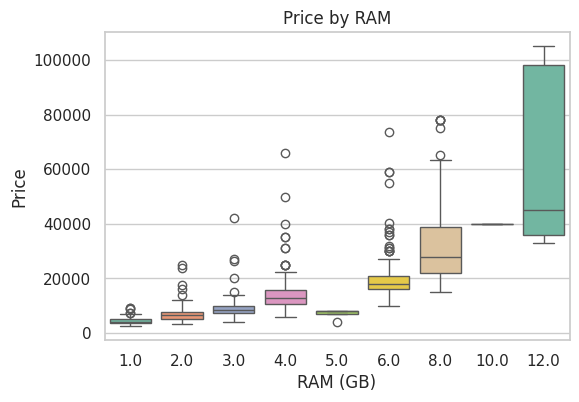

<ipython-input-13-102931881>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rom_gb', y='price', data=df, palette='Set3')


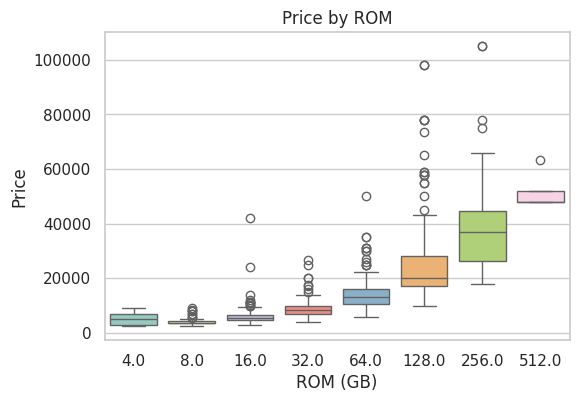

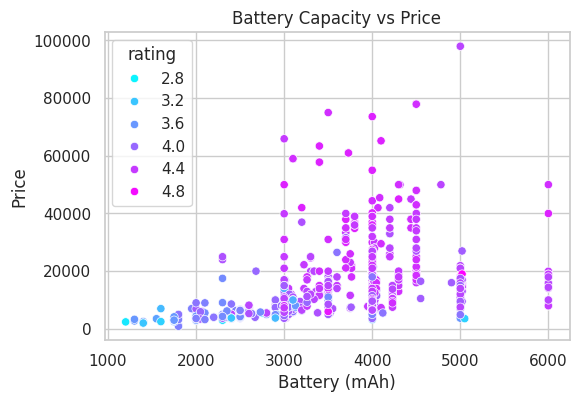

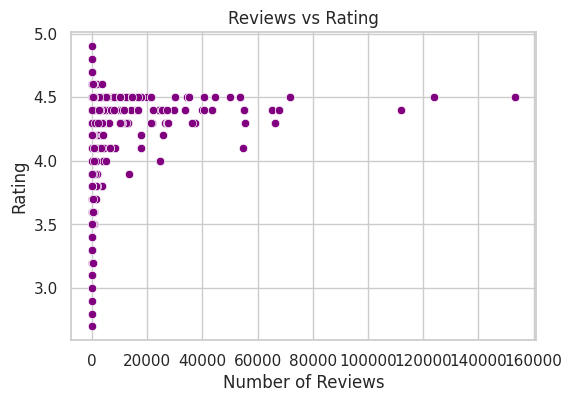

In [13]:
# STEP 7: Bivariate Relationships

# RAM vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='ram_gb', y='price', data=df, palette='Set2')
plt.title("Price by RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()

# ROM vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='rom_gb', y='price', data=df, palette='Set3')
plt.title("Price by ROM")
plt.xlabel("ROM (GB)")
plt.ylabel("Price")
plt.show()

# Battery vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='battery_mah', y='price', hue='rating', palette='cool', data=df)
plt.title("Battery Capacity vs Price")
plt.xlabel("Battery (mAh)")
plt.ylabel("Price")
plt.show()

# Reviews vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(x='reviews_num', y='rating', data=df, color='purple')
plt.title("Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()


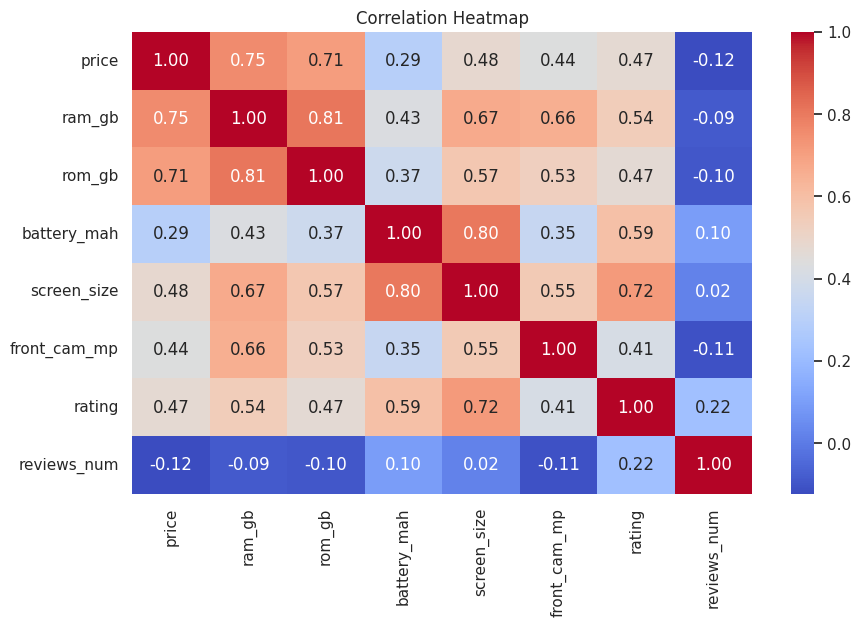

In [9]:
# STEP 8: Correlation Matrix

numeric_cols = ['price', 'ram_gb', 'rom_gb', 'battery_mah', 'screen_size',
                'front_cam_mp', 'rating', 'reviews_num']

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# STEP 9: Outlier Detection using IQR

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

print(f"Number of price outliers: {len(outliers)}")
outliers[['name', 'price']]


Number of price outliers: 79


,name,price
122,"OPPO Reno4 Pro (Silky White, 128 GB)",34990
155,"iQOO 3 (Quantum Silver, 256 GB)",37990
160,"Realme X2 Pro (Neptune Blue, 256 GB)",35999
222,"Asus ROG Phone 3 (Black, 128 GB)",49999
236,"OnePlus 7T (Frosted Silver, 128 GB)",34834
...,...,...
879,"Samsung Galaxy S10 Lite (Prism Black, 512 GB)",47999
939,"OnePlus 8 Pro (Onyx Black, 256 GB)",59990
940,"OnePlus 8 Pro (Glacial Green, 128 GB)",54999
973,"Google Pixel 3a XL (Just Black, 64 GB)",34999


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
# STEP 10: Final Enhanced Dataset Preview
df[['name', 'price', 'ram_gb', 'rom_gb', 'battery_mah',
    'screen_size', 'rear_cam_count', 'front_cam_mp',
    'rating', 'reviews_num']].head()


,name,price,ram_gb,rom_gb,battery_mah,screen_size,rear_cam_count,front_cam_mp,rating,reviews_num
0,"Redmi 8 (Ruby Red, 64 GB)",9999,4.0,64.0,5000.0,6.22,2.0,8.0,4.4,55078.0
1,"Realme 5i (Aqua Blue, 64 GB)",10999,4.0,64.0,5000.0,6.52,4.0,8.0,4.5,20062.0
2,"Realme 5i (Aqua Blue, 128 GB)",11999,4.0,128.0,5000.0,6.52,4.0,8.0,4.5,20062.0
3,"Realme 5i (Forest Green, 128 GB)",11999,4.0,128.0,5000.0,6.52,4.0,8.0,4.5,20062.0
4,"Realme C2 (Diamond Blue, 32 GB)",7499,3.0,32.0,4000.0,6.10,2.0,5.0,4.4,10091.0


from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ram_gb'].plot(kind='hist', bins=20, title='ram_gb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['rom_gb'].plot(kind='hist', bins=20, title='rom_gb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['battery_mah'].plot(kind='hist', bins=20, title='battery_mah')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='price', y='ram_gb', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='ram_gb', y='rom_gb', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='rom_gb', y='battery_mah', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='battery_mah', y='screen_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['ram_gb'].plot(kind='line', figsize=(8, 4), title='ram_gb')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['rom_gb'].plot(kind='line', figsize=(8, 4), title='rom_gb')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['battery_mah'].plot(kind='line', figsize=(8, 4), title='battery_mah')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='price', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='ram_gb', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='rom_gb', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='battery_mah', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)